<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Checking-the-data" data-toc-modified-id="Checking-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Checking the data</a></span><ul class="toc-item"><li><span><a href="#Load-the-necessary-libraries-and-data-and-start-coding" data-toc-modified-id="Load-the-necessary-libraries-and-data-and-start-coding-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the necessary libraries and data and start coding</a></span></li><li><span><a href="#Checking-Missing-Value" data-toc-modified-id="Checking-Missing-Value-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking Missing Value</a></span></li><li><span><a href="#Checking-Distribution-of-Target-Variable" data-toc-modified-id="Checking-Distribution-of-Target-Variable-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Checking Distribution of Target Variable</a></span></li></ul></li><li><span><a href="#Checking-Numeric-Variables" data-toc-modified-id="Checking-Numeric-Variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Checking Numeric Variables</a></span><ul class="toc-item"><li><span><a href="#Numerical-features-and-correlation-between-them" data-toc-modified-id="Numerical-features-and-correlation-between-them-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerical features and correlation between them</a></span></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Correlation matrix</a></span></li><li><span><a href="#Numeric-Correlation-Score" data-toc-modified-id="Numeric-Correlation-Score-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Numeric Correlation Score</a></span></li><li><span><a href="#Visualize-top-10-numeric-variables-in-a-data-set" data-toc-modified-id="Visualize-top-10-numeric-variables-in-a-data-set-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualize top 10 numeric variables in a data set</a></span></li></ul></li><li><span><a href="#Checking-Categorical-Variables" data-toc-modified-id="Checking-Categorical-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checking Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#ANOVA-test-to-understand-the-correlation" data-toc-modified-id="ANOVA-test-to-understand-the-correlation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ANOVA test to understand the correlation</a></span></li><li><span><a href="#Visualize-top-10-categorical-variables-in-a-data-set" data-toc-modified-id="Visualize-top-10-categorical-variables-in-a-data-set-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualize top 10 categorical variables in a data set</a></span></li></ul></li><li><span><a href="#Probelms-to-be-solved-in-next-steps" data-toc-modified-id="Probelms-to-be-solved-in-next-steps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Probelms to be solved in next steps</a></span></li></ul></div>

# Data Exploration

This Data Exploration step helps us understand the nature of variables (missing value, skewness, numeric feature) so that they can be treated properly.    
It involves correlation matrix, scatter plots, and histogram to understand the relationships and behavior of numeric features. To understand non-numeric variables, we will use ANOVA test and box-plot.

## Checking the data

### Load the necessary libraries and data and start coding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

We import the dataset files too using pandas

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

After we read the data, we can look at the data using: 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Showing shape of the train dataset

In [5]:
print ("Train data shape:", train.shape)

('Train data shape:', (1460, 81))


Showing shape of the test dataset

In [6]:
print ("Test data shape:", test.shape)

('Test data shape:', (1459, 80))


### Checking Missing Value

Let's check if the data set has any missing values. 

In [7]:
# check missing values
train.columns[train.isnull().any()]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

**Observation:**   
Out of 81 features, 19 features have missing values. Let's check the percentage of missing values in these columns. 

In [8]:
# missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

We can infer that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence.

### Checking Distribution of Target Variable

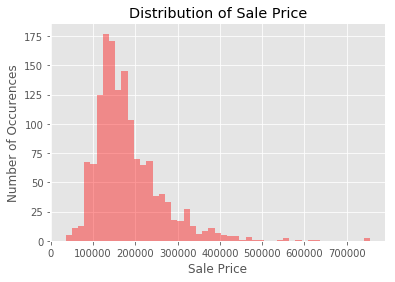

In [9]:
sns.distplot(train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")
plt.show()

**Observations:**
* We can see the distribution of sale price. The most common price of a house, in this case, is between 100 000 and 200 000. There are only several houses, where the price is less than 100 000 or more than 400 000.

* We see that the target variable SalePrice has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric. 

In [10]:
# skewness
print "The skewness of SalePrice is {}".format(train['SalePrice'].skew())

The skewness of SalePrice is 1.88287575977


## Checking Numeric Variables

###  Numerical features and correlation between them

Describing the statistical information about numerical features in the train dataset

In [11]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Here we are saving the Id of the house because we won't need it for fiting the model, we only need the features and the target variable which is in this case sale price.

In [12]:
train.drop("Id", axis = 1, inplace = True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Correlation matrix

Now, we are interested to learn about the correlation behavior of numeric variables. 

In [13]:
# getting only numerical values
numeric_features = train.select_dtypes(include=[np.number])

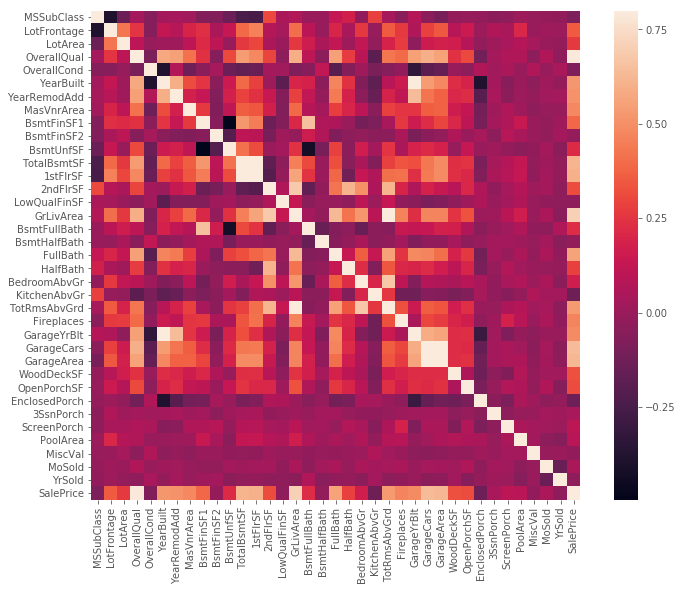

In [14]:
# Compute the correlation matrix
corr = numeric_features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

**Observations:**   
* Out of 38 variables, some of them are correlated. We have to remove these correlated variables as they won't provide any useful information to the model. 
* In the last row of this map, we can see the correlation of all variables against SalePrice. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better. 

### Numeric Correlation Score

In [15]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print (corr['SalePrice'].sort_values(ascending=False)[-5:])#last 5 values`

(SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64, '\n')
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### Visualize top 10 numeric variables in a data set

To get a quick glimpse of top 10 variables in a data set, let's plot scatter plots and histograms for the top 10 numeric variables to determine if they are skewed.

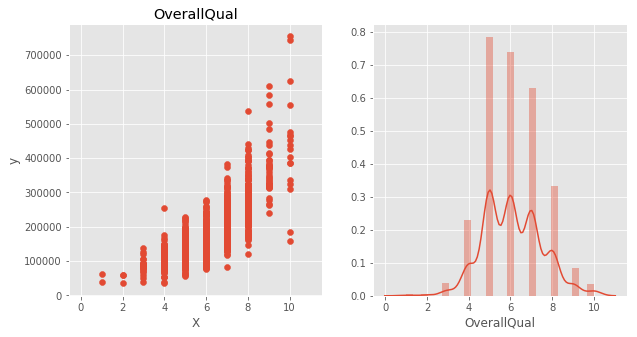

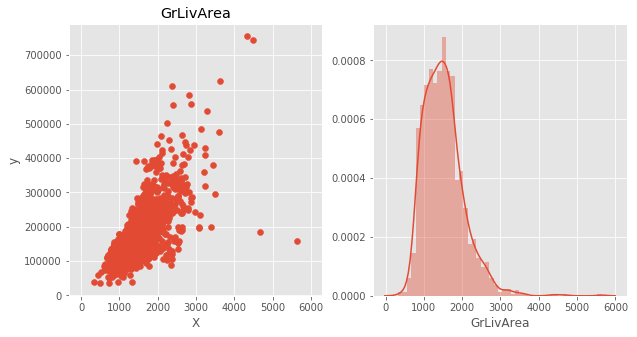

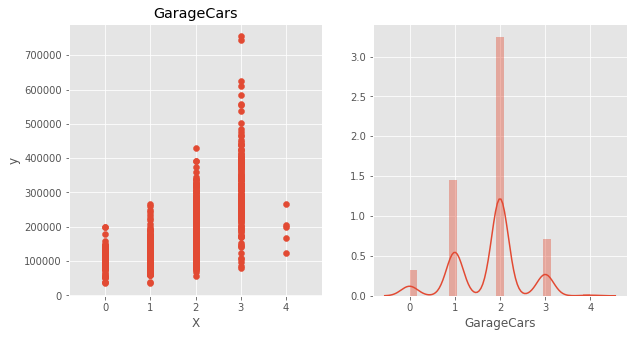

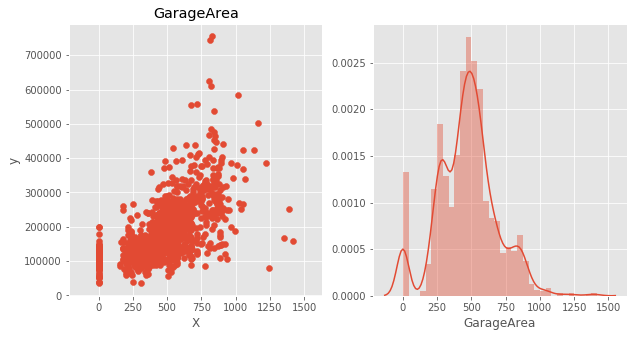

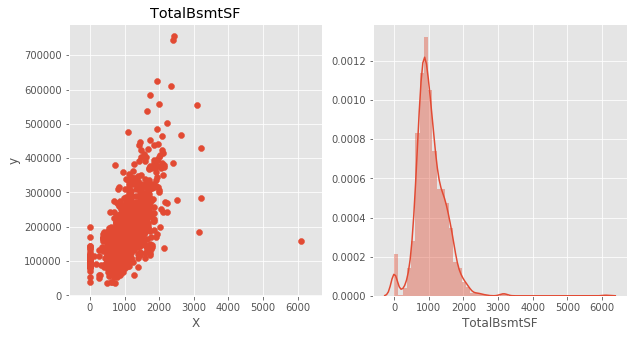

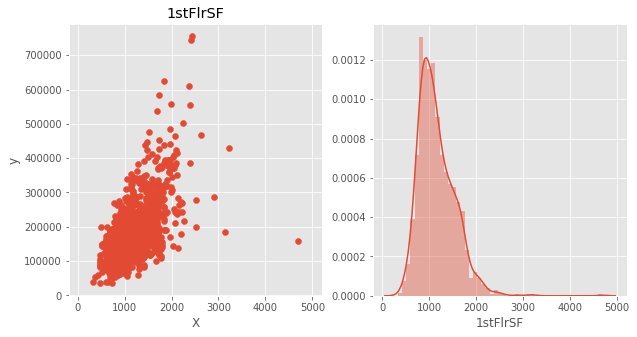

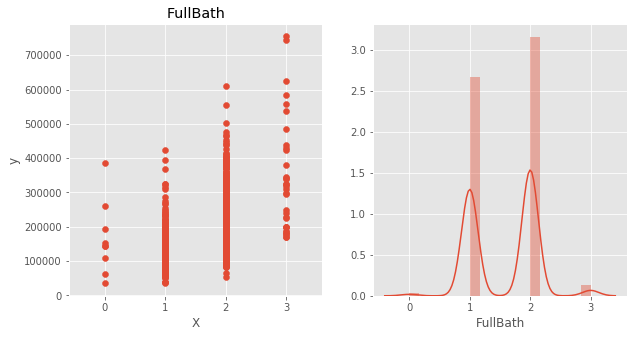

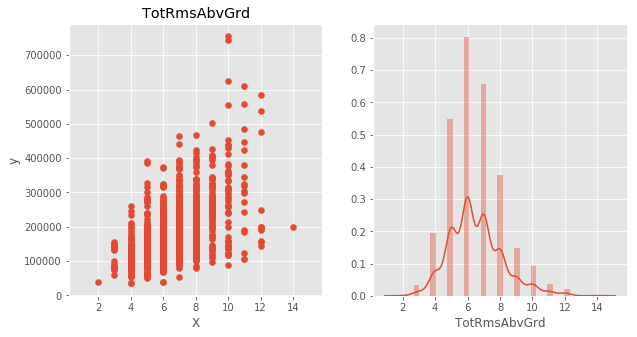

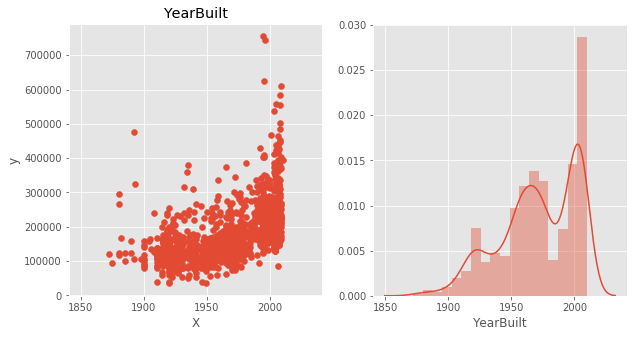

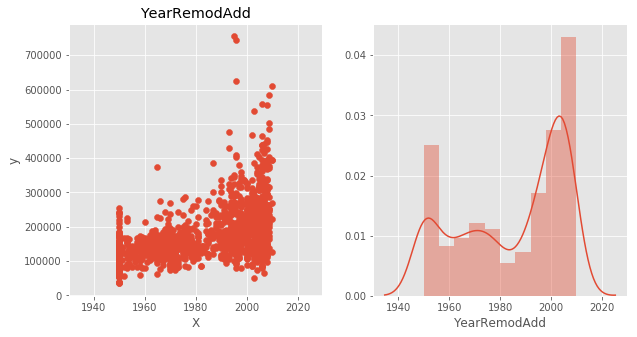

In [16]:
def plot_feature(X):
    y = train.loc[X.index, 'SalePrice']
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(X.name)

features=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']    
for feature in features:
    X = train[feature].dropna()
    fig , (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True)
    plt.subplot(ax1)
    plot_feature(X)
    plt.subplot(ax2)
    if train[feature].dtype == np.dtype('object'):
        sns.countplot(X)
    else:
        sns.distplot(X)

**Observations:**   
We see outliers in scatter plots and right-skewness in histograms.

## Checking Categorical Variables

Describing the statistical information about categorical features in the dataset

In [17]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### ANOVA test to understand the correlation

We used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. 

Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price. 

<module 'matplotlib.pyplot' from 'C:\Users\User\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

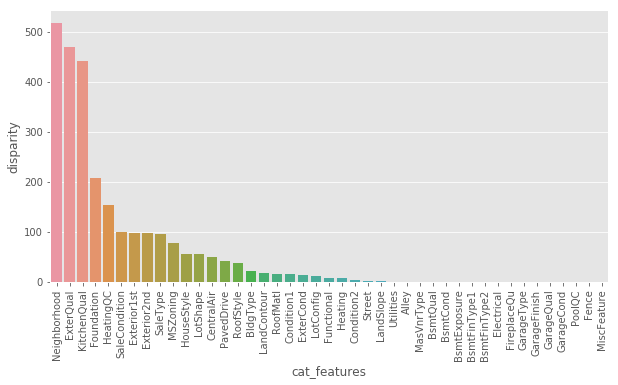

In [18]:
from scipy import stats
from scipy.stats import norm

cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['cat_features'] = cat
    pvals = []
    for c in cat:
        samples = []
        for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

categoricals['SalePrice'] = train.SalePrice.values
k = anova(categoricals) 
k['disparity'] = np.log(1./k['pval'].values)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(data=k, x = 'cat_features', y='disparity') 
plt.xticks(rotation=90) 
plt 

**Observations:**   
Here we see that among all categorical variables Neighborhood turned out to be the most important feature followed by ExterQual, KitchenQual, etc. It means that people also consider the goodness of the neighborhood, the quality of the kitchen, the quality of the material used on the exterior walls, etc.   

### Visualize top 10 categorical variables in a data set

For top 10 categorical variables, we'll create a boxplot and understand their nature. 

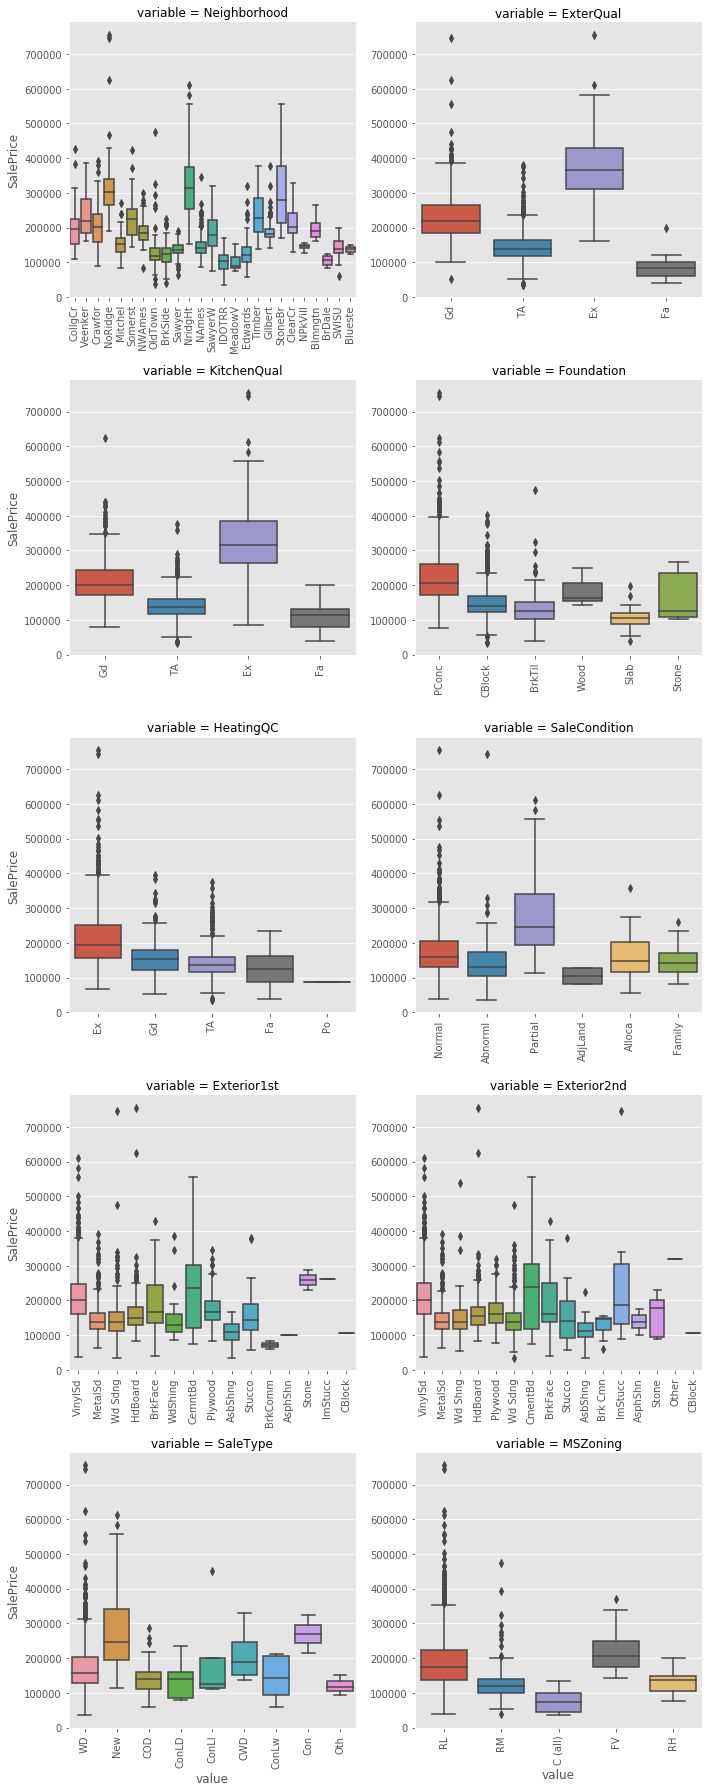

In [19]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

features=['Neighborhood', 'ExterQual', 'KitchenQual', 'Foundation', 'HeatingQC', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'SaleType', 'MSZoning']    

f = pd.melt(train, id_vars=['SalePrice'], value_vars=features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")
plt.show()

**Obserbations:**   
Here, we can see that most of the variables possess outlier values. We will treat these outlier values by a method or let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers. 

## Probelms to be solved in next steps

**We have identified following problems in this data exploration:**   
1. 19 features have missing values.
1. The target variables SalePrice has a right-skewed distribution.
1. Correlation matrix shows multicollinearity. 
1. Outlier values in numeric and categorical variables.
1. Most of numeric variables are right skewed.
1. Numeric and categorical variables have to be combined to use algorithn and make prediction.   

We will give solutions to these problems in next steps.